<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [2]:
model = Sequential()
model.add(SimpleRNN(3, input_shape = (2,10)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape = (8, 2, 10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
import numpy as np

train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)
print(train_X)


(1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]


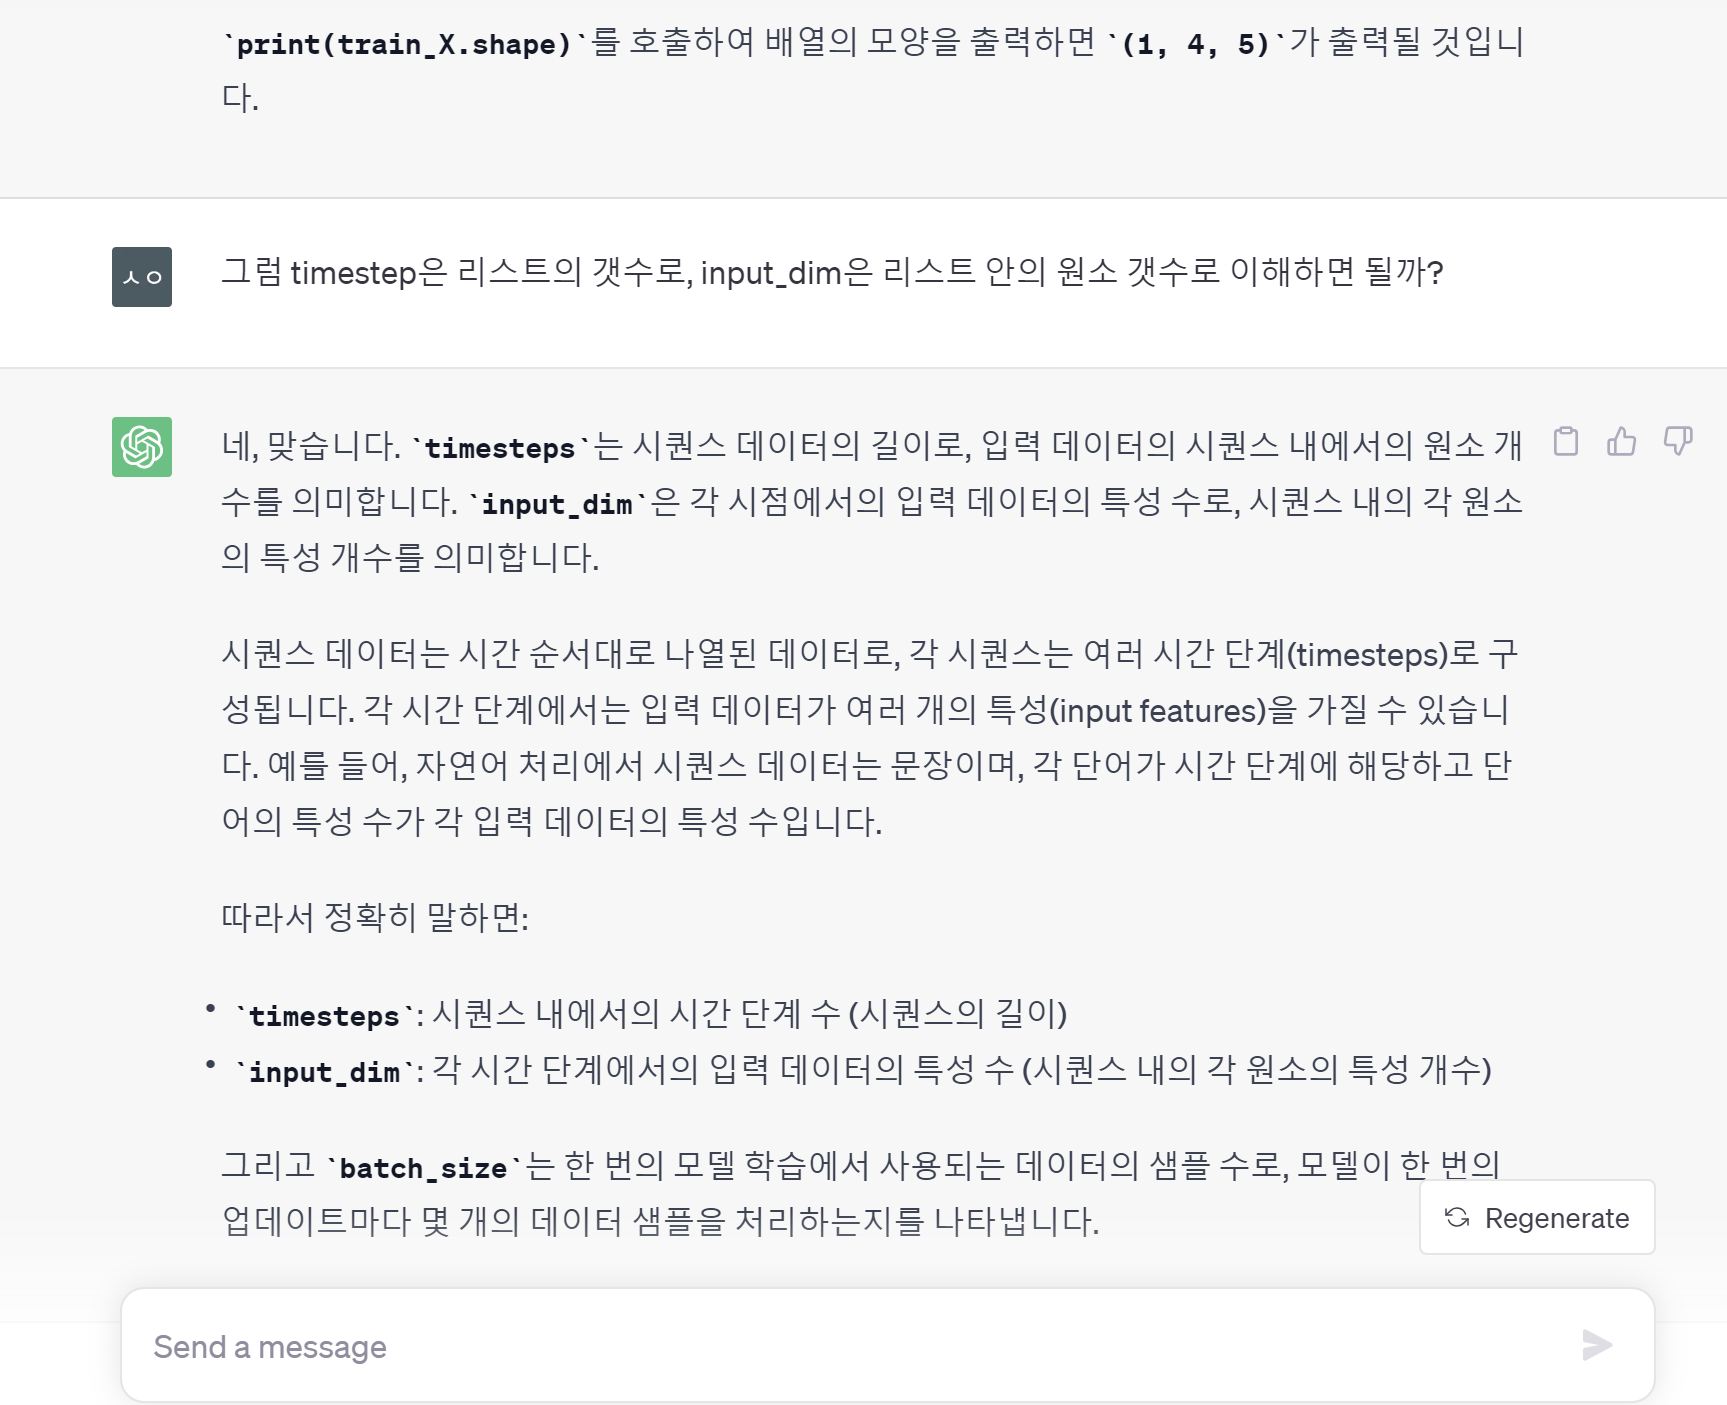

In [5]:
rnn = SimpleRNN(3)
hidden_state = rnn(train_X)
print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.99625933  0.96931213 -0.9992056 ]], shape : (1, 3)


In [6]:
rnn = SimpleRNN(3, return_sequences=True) #False가 기본값, True라면 모든 시점의 은닉 상태를 출력한다.
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))


hidden states : [[[-0.71220386  0.5126723   0.79299915]
  [-0.7947529   0.9021379  -0.43149245]
  [-0.99408203  0.5852355  -0.46310475]
  [-0.9963931  -0.81948215 -0.821515  ]]], shape: (1, 4, 3)


In [7]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))


hidden state : [[ 0.66333026  0.9665271  -0.9975134 ]], shape: (1, 3)
last hidden state : [[ 0.66333026  0.9665271  -0.9975134 ]], shape: (1, 3)


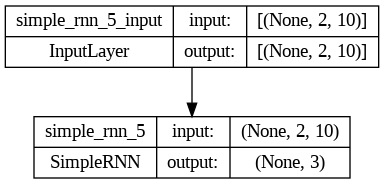

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.utils import plot_model

# 모델 생성
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10)))

# 모델 구조를 이미지 파일로 저장
plot_model(model, to_file='simple_rnn.png', show_shapes=True, show_layer_names=True)